## Q1

In [27]:
import numpy as np
import pandas as pd
from scipy.stats import hypergeom

In [3]:
# importing the dataset
HK_rxns=pd.read_csv('HK_rxns.csv')
clust = pd.read_csv('Cluster_rxn_set.csv')
clust.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887
0,cluster1,RE3186M,r1964,r0552,GLYSARCNc,PI45P5P,ACONT,RE2912M,LCADi_D,S2TASE2ly,...,NDPK7,GSNtm,PUNP7,GLYPROPRO1c,RE1532X,r1803,ACACT10m,LEULEULAPc,RE1956R,r0393
1,cluster2,RE2921X,AMACR2p,RE3186M,MMSAD3m,COQ7m,HPDCACRNCPT1,RE2915X,C2M26DCOAHLx,r0734,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cluster3,TSTSTERONESULT,RE3264R,PHETHPTOX2,RE1796M,HMGLm,LSTNM7hr,RE2383R,HSD3B11,P4508B11r,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cluster4,RE3103C,GALt1r,RE3161C,PEFLIPm,NTD2m,GCNTg,r0591,PI345P5P,ALAt4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cluster5,CRNATBtc,ASNATB0tc,RE2383R,r2321,RE3561X,LCADi_D,LYSt4,P4502C94,SARDHm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# counting numbr of HK reactions in each of the cluster
clust_count ={}
for i in range(26):
    clust_count['cluster'+str(i+1)] = np.sum(np.isin(clust.T[i],HK_rxns))

In [32]:
# identifying the clusters enriched with HK reactions using hypergeometric test
alpha = 0.05
total_rxns = 4551
total_HK_rxns = len(HK_rxns['HK_reactions'].values)
for i in range(26):
    k,M,n,N = clust_count['cluster'+str(i+1)],total_rxns,total_HK_rxns,len(clust.T[i].dropna())-1
    if 1-hypergeom.cdf(k,M,n,N)<0.05:
        print('cluster number',i+1,'is enriched with HK reactions')

cluster number 1 is enriched with HK reactions
cluster number 2 is enriched with HK reactions
cluster number 11 is enriched with HK reactions
cluster number 22 is enriched with HK reactions
cluster number 23 is enriched with HK reactions
cluster number 24 is enriched with HK reactions
cluster number 25 is enriched with HK reactions


## Q2 
Solution given only to covid 'deaths per million' of high income conuntires (vs) rest of the world

In [33]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [34]:
# importing data
df=pd.read_csv('Hygiene.csv',encoding='latin1')
df.groupby('Income').size()

Income
High income     45
Low income      15
Lower middle    25
Upper middle    37
dtype: int64

Since the sample size is large for the hypothesis test, z-test can be used

In [35]:
x1=df['Death per million'][df.Income=='High income'] # death per million in high income countries
x2=df['Death per million'][df.Income!='High income'] # death per million in rest of the world

In [37]:
# for H0: mu1-mu2 = 0 and H1: mu1-mu2 > 0

# to get test stat
def TS(S1,S2,H0):
    X1bar,X2bar=np.mean(S1),np.mean(S2)
    std1,std2=np.std(S1,ddof=1),np.std(S2,ddof=1)
    den=np.sqrt((std1**2/len(S1))+(std2**2/len(S2)))
    TS=(X1bar-X2bar-H0)/den
    return TS
test_stat=TS(x1,x2,0)

In [40]:
def HT(TS,H1,alpha):
    if H1 =='two-sided':
        cv1,cv2=stats.norm.ppf(alpha/2),stats.norm.ppf(1-alpha/2)
        pvalue=2*(1-stats.norm.cdf(np.abs(TS)))
        if TS>cv2 or TS<cv1:
            print('We reject the null hypothesis')
        else:
            print('We failed to reject null hypothesis')
    elif H1 =='larger':
        cv=stats.norm.ppf(1-alpha)
        pvalue=1-stats.norm.cdf(TS)
        if TS>cv:
            print('We reject the null hypothesis')
        else:
            print('We failed to reject null hypothesis')
    elif H1 =='smaller':
        cv=stats.norm.ppf(alpha)
        pvalue=stats.norm.cdf(TS)
        if TS<cv:
            print('We reject the null hypothesis')
        else:
            print('We failed to reject null hypothesis')
    return pvalue

print('The p-value is',HT(test_stat,'larger',0.05))

We reject the null hypothesis
The p-value is 8.742617107226902e-05


Hence there is a significant difference between the average death per million of high income contries vs rest of the world

## Q3

In [41]:
# importing libraries
import numpy as np
import pandas as pd
from scipy.stats import t
from statsmodels.stats.power import tt_solve_power

In [42]:
# loading data
data=pd.read_csv('Hygiene.csv',encoding='unicode_escape')
lw_inc=data['Percentage Population Rural'][data['Income']=='Low income']

**Part a**

In [43]:
# As the population is normal and sample size is smaller, ttest can be used
# to test the hypothesis and returning the pvalue and test stat for a ttest
def HT(data,H0,H1,alpha):
    Xbar=np.mean(data)
    std1=np.std(data,ddof=1)
    den=np.sqrt((std1**2/len(data)))
    TS=(Xbar-H0)/den # the test statistic
    df=len(data)-1 # degrees of freedom
    if H1 =='two-sided': # if alternate hypothesis is not equal
        cv1,cv2=t.ppf(alpha/2,df),t.ppf(1-alpha/2,df) # critical values
        pvalue=2*(1-t.cdf(np.abs(TS),df))
        if TS>cv2 or TS<cv1:
            print('We reject the null hypothesis')
        else:
            print('We failed to reject null hypothesis')
    elif H1 =='larger': # if alternate hypothesis is greater than
        cv=t.ppf(1-alpha,df) # critical values
        pvalue=1-t.cdf(TS,df)
        if TS>cv:
            print('We reject the null hypothesis')
        else:
            print('We failed to reject null hypothesis')
    elif H1 =='smaller': # if alternate hypothesis is lesser than
        cv=t.ppf(alpha,df) # critical values
        pvalue=t.cdf(TS,df)
        if TS<cv:
            print('We reject the null hypothesis')
        else:
            print('We failed to reject null hypothesis')
    return TS,pvalue # returning teststatistic and pvalue
print('For question a...\n')

test_stat,pval=HT(lw_inc,66,'larger',0.05)

print('\n No, there is no sufficient evidence to support a claim that the average \
percentage of rural population from low income countries exceeds 66 with a significance level of 0.05')

For question a...

We failed to reject null hypothesis

 No, there is no sufficient evidence to support a claim that the average percentage of rural population from low income countries exceeds 66 with a significance level of 0.05


**Part b**

In [44]:
print('\n For question b...')
n=len(lw_inc) # number of samples
std1=np.std(lw_inc,ddof=1)
true_mean=67.5
H0=66
delta=true_mean-H0
alpha=0.05
power=tt_solve_power(effect_size=delta/std1,nobs=n,alpha=0.05,alternative='larger')
print('\n The power of the statistical test is', power)


 For question b...

 The power of the statistical test is 0.1069635983159607


**Part c**

In [45]:
print('\n For question c...')
mu=np.mean(lw_inc)
df=len(lw_inc)-1
t_alpha_2=t.ppf(alpha/2,df) 
std1=np.std(lw_inc,ddof=1)
deviation = t_alpha_2*(std1/np.sqrt(len(lw_inc)))
LB, UB = mu-deviation, mu+deviation 
print('\n The lower and upper bounds of the mean of the population are', LB, UB,'respectively')
print('\n As 66 lies within the two sided confidence interval. we fail to reject the null hypothesis' )


 For question c...

 The lower and upper bounds of the mean of the population are 72.22927196140614 56.98459470526052 respectively

 As 66 lies within the two sided confidence interval. we fail to reject the null hypothesis


**Part d**

In [47]:
print('\n For question d...')
n=len(lw_inc) # number of samples
std1=np.std(lw_inc,ddof=1)
true_mean=70
H0=66
delta=true_mean-H0
alpha=0.05
n_samples=tt_solve_power(effect_size=delta/std1,power=0.6,alpha=0.05,alternative='larger')
print('\n Number of samples required are', int(n_samples))


 For question d...

 Number of samples required are 44


## Q4

**For topology 1**

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm

In [10]:
# stoichimetric matrix with columns denoting the reactions and rows denoting the metabolites
S=np.array([[1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,-1,-1,-1,0,0,0,0,0,0,0,0],
          [0,0,0,1,1,0,0,-1,-1,0,0,0,0,0,0],[0,0,0,0,0,0,1,1,0,-1,-1,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,-1,0,0,0],
          [0,0,0,0,0,0,0,0,0,1,0,1,0,-1,0],[0,0,0,0,0,0,0,0,0,0,1,0,1,0,-1],[0,0,0,0,0,0,0,0,1,0,0,0,-1,0,0]])
print('The stoichiometric matrix \n',S)

The stoichiometric matrix 
 [[ 1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 -1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0 -1 -1 -1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  0  0 -1 -1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  0 -1 -1  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  1  0 -1  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  1  0 -1]
 [ 0  0  0  0  0  0  0  0  1  0  0  0 -1  0  0]]


a) Multiplying the stochiometric matrix with the flux vector gives the required mass balance equations

b) 
For the 1st equation,<br>
$V_{m,1} - V_{m,2} = 0$ <br>
The above equation is a linear combination of the normal distibution, hence the final equation also follows normal distribution with mean $V_{a,1} - V_{a,2}$ and variance 2 [Var(X+Y) = Var(X) +Var(Y) if X and Y are independent].



c) For the 1st equation,<br>
H0: $\mu_{V_{m,1} - V_{m,2}} = 0$ <br>
H1: $\mu_{V_{m,1} - V_{m,2}} \neq 0$

d) Since the parent distribution is normal with known variance and sample size 3. z-test can be used

In [4]:
# importing the dataset
flux_vec=pd.read_csv('Q4.csv')
flux_vec.head()

,Unnamed: 0,sample1,sample2,sample3
0,v1,70.189789,67.758054,69.929964
1,v2,69.734107,69.515106,68.846035
2,v3,55.734217,56.391096,56.900152
3,v4,56.799578,55.589391,55.404114
4,v5,23.638858,25.114001,24.349646


In [5]:
# getting values of the mass balance equations using Stoichiometric matrix and sample data
met_conc=[]
for sam in flux_vec.columns[1:]:
    met_conc.append(S.dot(flux_vec[sam]))

In [11]:
met_conc=np.array(met_conc)
# here x_bar is the test statistic for a given equation
x_bar=np.mean(met_conc,axis=0)
# variance array
var=np.array([2,2,4,4,4,2,3,3,2])
test_stats=x_bar/np.sqrt(var/3) # array of test statistic

In [12]:
# getting p-values for each of the above mass balance equaiton
pvals=[]
for z in test_stats:
    pvals.append(2*(1-norm.cdf(abs(z))))

In [13]:
pvals

[0.9292647347660461,
 0.6148813658706866,
 0.6722866160109437,
 0.349451253351317,
 0.6305153188304351,
 0.40290548306332585,
 0.6994371487330273,
 0.010415994129402417,
 0.13666381407065598]

Since the obtained p-values are greater than 0.05 we fail to reject the null hypothesis. Thereby, we can say that there is no accumulation of metabolites in the system. This topology seems to be correct one.

**For topology 2**

In [17]:
# stoichimetric matrix with columns denoting the reactions and rows denoting the metabolites
S1=np.array([[1,0,0,0,0,0,-1,0,0,0,0,0,0,0,0],[0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0],[0,-1,0,0,-1,-1,1,0,0,0,0,0,0,0,0],
          [0,0,0,1,1,0,0,-1,-1,0,0,0,0,0,0],[0,1,0,0,0,0,0,1,0,-1,-1,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,-1,0,0,0],
          [0,0,0,0,0,0,0,0,0,1,0,1,0,-1,0],[0,0,0,0,0,0,0,0,0,0,1,0,1,0,-1],[0,0,0,0,0,0,0,0,1,0,0,0,-1,0,0]])
print('The stoichiometric matrix for the topology 2 is \n',S1)

The stoichiometric matrix for the topology 2 is 
 [[ 1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0]
 [ 0  0  1 -1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 -1  0  0 -1 -1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  0  0 -1 -1  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  1  0 -1 -1  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  1  0 -1  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  1  0 -1]
 [ 0  0  0  0  0  0  0  0  1  0  0  0 -1  0  0]]


In [18]:
# getting values of the mass balance equations using Stoichiometric matrix and sample data
met_conc=[]
for sam in flux_vec.columns[1:]:
    met_conc.append(S1.dot(flux_vec[sam]))

In [19]:
met_conc=np.array(met_conc)
# here x_bar is the test statistic for a given equation
x_bar=np.mean(met_conc,axis=0)
# variance array
var=np.array([2,2,4,4,4,2,3,3,2])
test_stats=x_bar/np.sqrt(var/3) # array of test statistic

In [20]:
# getting p-values for each of the above mass balance equaiton
pvals=[]
for z in test_stats:
    pvals.append(2*(1-norm.cdf(abs(z))))

In [21]:
pvals

[0.0,
 0.6148813658706866,
 0.0,
 0.349451253351317,
 0.0,
 0.40290548306332585,
 0.6994371487330273,
 0.010415994129402417,
 0.13666381407065598]

Since the p-values for metabolites 'A','C' and 'E' are less than 0.05 we reject the null hypothesis for these 3 equations. Thereby, we can say that there is accumulation/consumption of these metabolites in the system which does not follow our assumption. Hence this topology is the wrong one.

## Q5

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('Q5.csv')
df.head()

,Z
0,6.647791
1,0.531009
2,2.253752
3,5.723086
4,4.338248


In [38]:
# taking 1000 bootstraps and calculating the statistic for them
test_stats=[]
for i in range(1000):
    samp = df['Z'].sample(frac=1,replace=True) # bootstrap sample
    test_stats.append(np.sum(samp**(-2)*(np.exp(samp)))/len(samp))
test_stats = np.array(test_stats)

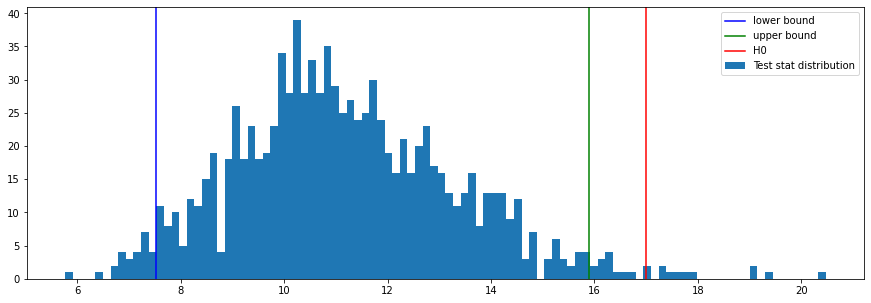

In [48]:
# With the obtained test stat distribution, percentile values can be calculated to get the bounds
H0 = 17
plt.subplots(figsize=(15,5))
plt.hist(test_stats,bins=100,label='Test stat distribution')
plt.axvline(x=np.percentile(test_stats,2.5),color='b',label='lower bound')
plt.axvline(x=np.percentile(test_stats,97.5),color='g',label='upper bound')
plt.axvline(x=H0,color='r',label='H0')
plt.legend()

As the stated null hypothesis (H0 = 17) does not lie in within the bounds, we can reject the null hypothesis.